In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import collections


pd.set_option('display.max_columns', None) # Show all columns

## Reading in AHRQ SDOH data

In [191]:
path = 'data/sdoh_2020_tract_1_0.xlsx'
dfs = pd.read_excel(
        path,
        sheet_name = None,
        dtype = str,
        na_filter = False,
        nrows = 1000,
)

for name, df in dfs.items():
    print(name)
    with pd.option_context('display.max_columns', None):
        display(df.head())

layout_df = dfs['Layout']

Layout


,name,label,type,length,format
0,YEAR,SDOH file year,num,3,4.
1,TRACTFIPS,State-county-census tract FIPS Code (11-digit),char,11,$11.
2,COUNTYFIPS,State-county FIPS Code (5-digit),char,5,$5.
3,STATEFIPS,State FIPS Code (2-digit),char,2,$2.
4,STATE,State name,char,25,$25.


Data


,YEAR,TRACTFIPS,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_WORKER_HH,ACS_TOT_WORKER_NWFH,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_FEMALE,ACS_PCT_MALE,ACS_PCT_CTZ_ABOVE18,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_CTZ_US_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VET,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_FEMALE,ACS_MEDIAN_AGE_MALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ARMED_FORCES,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_EMPLOYED,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_NOT_LABOR,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_UNEMPLOY,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,

See what columns are not numbers

In [192]:
def scope():
    nonnumerics = []
    for name, row in layout_df.iterrows():
        if row['type'] != 'num':
            nonnumerics.append(name)

    for name in nonnumerics:
        print(f'        {name!r}: str,')

scope()

        1: str,
        2: str,
        3: str,
        4: str,
        5: str,
        6: str,
        328: str,


Read the entire file this time and default all columns to having float values with some exceptions. Takes around 3 minutes.

In [193]:
'''
#importing pandas as pd 
import pandas as pd 

# Read and store content 
# of an excel file 
read_file = pd.read_excel ("../data/ahrq/sdoh_2020_tract_1_0.xlsx", sheet_name="Data") 

# Write the dataframe object 
# into csv file 
read_file.to_csv ("../data/ahrq/sdoh_2020_tract_1_0_data.csv", 
				index = None, 
				header=True) 
	
# read csv file and convert 
# into a dataframe object 
df = pd.DataFrame(pd.read_csv("../data/ahrq/sdoh_2020_tract_1_0_data.csv")) 

# show the dataframe 
df
'''

'\n#importing pandas as pd \nimport pandas as pd \n\n# Read and store content \n# of an excel file \nread_file = pd.read_excel ("../data/ahrq/sdoh_2020_tract_1_0.xlsx", sheet_name="Data") \n\n# Write the dataframe object \n# into csv file \nread_file.to_csv ("../data/ahrq/sdoh_2020_tract_1_0_data.csv", \n\t\t\t\tindex = None, \n\t\t\t\theader=True) \n\t\n# read csv file and convert \n# into a dataframe object \ndf = pd.DataFrame(pd.read_csv("../data/ahrq/sdoh_2020_tract_1_0_data.csv")) \n\n# show the dataframe \ndf\n'

In [194]:
'''
data_df = pd.read_excel(
    path,
    sheet_name = (
        'Data'
    ),
    dtype = collections.defaultdict(lambda: float) | {
        'TRACTFIPS': str,
        'COUNTYFIPS': str,
        'STATEFIPS': str,
        'STATE': str,
        'COUNTY': str,
        'REGION': str,
        'CEN_AIAN_NH_IND': str,
    },
    na_filter = True,
    na_values=['', ' '],
)
'''

path = 'data/sdoh_2020_tract_1_0_data.csv'
data_df = pd.read_csv(
    path,
    dtype = collections.defaultdict(lambda: float) | {
        'TRACTFIPS': str,
        'COUNTYFIPS': str,
        'STATEFIPS': str,
        'STATE': str,
        'COUNTY': str,
        'REGION': str,
        'CEN_AIAN_NH_IND': str,
    },
    na_filter = True,
    na_values=['', ' '],
)
display(data_df)

,YEAR,TRACTFIPS,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_WORKER_HH,ACS_TOT_WORKER_NWFH,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_FEMALE,ACS_PCT_MALE,ACS_PCT_CTZ_ABOVE18,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_CTZ_US_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VET,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_FEMALE,ACS_MEDIAN_AGE_MALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ARMED_FORCES,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_EMPLOYED,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_NOT_LABOR,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_UNEMPLOY,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,

In [195]:
# Display info on the data columns
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85528 entries, 0 to 85527
Columns: 329 entries, YEAR to CEN_AIAN_NH_IND
dtypes: float64(322), object(7)
memory usage: 214.7+ MB


In [196]:
# Generate statistics on the data columns
df.describe()

,YEAR,TRACTFIPS,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_WORKER_HH,ACS_TOT_WORKER_NWFH,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_FEMALE,ACS_PCT_MALE,ACS_PCT_CTZ_ABOVE18,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_CTZ_US_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VET,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_FEMALE,ACS_MEDIAN_AGE_MALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ARMED_FORCES,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_EMPLOYED,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_NOT_LABOR,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_UNEMPLOY,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,

## Merge with TN census tract shapefile

In [197]:
shapefile = gpd.read_file('data/tl_2020_47_tract/tl_2020_47_tract.shp')
display(shapefile.head())

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,175,925200,47175925200,9252,Census Tract 9252,G5020,S,227429512,1667739,+35.7438100,-085.4940227,"POLYGON ((-85.61516 35.76106, -85.61509 35.761..."
1,47,175,925000,47175925000,9250,Census Tract 9250,G5020,S,480712883,1225717,+35.6695378,-085.4220628,"POLYGON ((-85.60513 35.70854, -85.60511 35.708..."
2,47,003,950201,47003950201,9502.01,Census Tract 9502.01,G5020,S,121774227,0,+35.6517480,-086.5575518,"POLYGON ((-86.64406 35.64029, -86.64375 35.642..."
3,47,003,950202,47003950202,9502.02,Census Tract 9502.02,G5020,S,110617191,700793,+35.5845755,-086.5790796,"POLYGON ((-86.66377 35.58189, -86.66367 35.582..."
4,47,093,003300,47093003300,33,Census Tract 33,G5020,S,5860088,229299,+36.0020586,-083.8371218,"POLYGON ((-83.86208 35.99255, -83.86207 35.992..."


In [198]:
# After performing the merge
merged = data_df.merge(shapefile[['GEOID', 'geometry']], left_on='TRACTFIPS', right_on='GEOID', how='left')

# Reorder the columns to move 'GEOID' and 'geometry' to the front
columns = ['GEOID', 'geometry'] + [col for col in merged.columns if col not in ['GEOID', 'geometry']]
merged = merged[columns]

gdf = gpd.GeoDataFrame(merged, geometry='geometry')
tennessee_gdf = gdf[gdf["GEOID"].astype(str).str.startswith('47')]
display(tennessee_gdf)

,GEOID,geometry,YEAR,TRACTFIPS,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_WORKER_HH,ACS_TOT_WORKER_NWFH,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_FEMALE,ACS_PCT_MALE,ACS_PCT_CTZ_ABOVE18,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_CTZ_US_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VET,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_FEMALE,ACS_MEDIAN_AGE_MALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ARMED_FORCES,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_EMPLOYED,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_NOT_LABOR,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_UNEMPLOY,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALT

Filter down to the columns I initially think will be useful to career prediction.

In [199]:
filtered_tennessee_gdf = tennessee_gdf[
    [
        'GEOID',
        'geometry',
        'STATE',
        'COUNTY',
        'COUNTYFIPS',
        'CEN_POPDENSITY_TRACT',

        'ACS_MEDIAN_AGE',
        'ACS_PCT_AGE_18_29',
        'ACS_PCT_AGE_30_44', 
        'ACS_PCT_AGE_45_64',

        'ACS_PCT_LT_HS',
        'ACS_PCT_HS_GRADUATE',
        'ACS_PCT_COLLEGE_ASSOCIATE_DGR',   
        'ACS_PCT_BACHELOR_DGR',
        'ACS_PCT_GRADUATE_DGR',
        'ACS_PCT_POSTHS_ED',
        
        'ACS_MEDIAN_HH_INC',
        'ACS_MEDIAN_INC_F',
        'ACS_MEDIAN_INC_M',
        
        'ACS_PCT_EMPLOYED',
        'ACS_PCT_NOT_LABOR',
        'ACS_PCT_UNEMPLOY',

        'ACS_PCT_ADMIN',
        'ACS_PCT_ARMED_FORCES',
        'ACS_PCT_ART',
        'ACS_PCT_CONSTRUCT',
        'ACS_PCT_EDUC',
        'ACS_PCT_FINANCE',
        'ACS_PCT_GOVT',
        'ACS_PCT_INFORM',
        'ACS_PCT_MANUFACT',
        'ACS_PCT_NATURE',
        'ACS_PCT_PROFESS',
        'ACS_PCT_RETAIL',
        'ACS_PCT_TRANSPORT',
        'ACS_PCT_WHOLESALE',
    ]
]

display(filtered_tennessee_gdf)


,GEOID,geometry,STATE,COUNTY,COUNTYFIPS,CEN_POPDENSITY_TRACT,ACS_MEDIAN_AGE,ACS_PCT_AGE_18_29,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_LT_HS,ACS_PCT_HS_GRADUATE,ACS_PCT_COLLEGE_ASSOCIATE_DGR,ACS_PCT_BACHELOR_DGR,ACS_PCT_GRADUATE_DGR,ACS_PCT_POSTHS_ED,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_PCT_EMPLOYED,ACS_PCT_NOT_LABOR,ACS_PCT_UNEMPLOY,ACS_PCT_ADMIN,ACS_PCT_ARMED_FORCES,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_PROFESS,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE
68678,47001020100,"POLYGON ((-84.32016 35.99186, -84.32008 35.991...",Tennessee,Anderson County,47001,600.43,31.9,21.44,20.16,23.88,5.18,25.70,45.58,15.00,8.53,69.12,36130.0,20497.0,33016.0,96.77,35.58,3.23,3.92,0.00,13.17,4.88,20.05,3.60,11.89,0.51,12.40,0.00,19.47,13.62,6.04,0.71
68679,47001020201,"POLYGON ((-84.24333 36.00161, -84.2433 36.0016...",Tennessee,Anderson County,47001,415.13,44.8,13.88,17.62,29.82,2.48,14.28,17.80,26.63,38.81,83.24,91078.0,35000.0,70106.0,98.51,34.98,1.49,4.86,0.00,6.42,6.69,27.42,4.08,17.65,0.00,7.66,0.00,29.48,5.91,1.79,1.19
68680,47001020202,"POLYGON ((-84.25132 36.00539, -84.25124 36.005...",Tennessee,Anderson County,47001,1215.23,44.0,12.98,15.84,24.41,11.08,19.27,26.83,18.37,24.44,69.65,46944.0,28833.0,44384.0,99.53,53.18,0.47,1.48,0.00,4.43,11.28,19.01,6.65,15.45,0.20,5.84,0.00,24.31,3.22,20.21,0.00
68681,47001020300,"POLYGON ((-84.24401 36.04229, -84.2409 36.0440...",Tennessee,Anderson County,47001,2032.58,36.2,9.04,17.88,26.70,17.47,27.11,34.79,12.63,8.00,55.42,55290.0,25352.0,35750.0,97.93,39.45,2.07,5.69,0.00,9.20,14.71,17.92,1.51,12.17,1.15,9.87,0.48,19.07,11.44,4.48,0.00
68682,47001020400,"POLYGON ((-84.29175 36.02379, -84.29149 36.023...",Tennessee,Anderson County,47001,1090.49,37.2,13.85,19.39,23.85,11.40,33.02,35.79,12.11,7.68,55.58,49025.0,20638.0,30993.0,91.29,43.53,8.71,1.74,0.00,10.56,13.76,28.13,1.74,4.32,1.29,11.45,0.00,14.82,11.34,3.37,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70374,47189030905,"POLYGON ((-86.50228 36.09179, -86.50226 36.091...",Tennessee,Wilson County,47189,249.75,41.5,7.82,20.85,34.58,3.94,27.58,29.48,18.12,20.88,68.48,95045.0,25163.0,54665.0,97.82,29.47,2.18,1.66,0.21,16.43,9.28,24.12,6.65,11.98,0.47,9.02,0.00,10.68,7.02,6.59,4.32
70375,47189030906,"POLYGON ((-86.56794 36.16886, -86.56778 36.168...",Tennessee,Wilson County,47189,444.61,40.7,9.48,20.06,25.60,3.12,23.02,26.09,28.64,19.13,73.86,105090.0,37708.0,65072.0,97.04,38.33,2.96,1.66,0.53,0.89,7.19,25.09,13.76,8.40,2.76,11.33,0.00,10.88,9.95,3.21,1.71
70376,47189030907,"POLYGON ((-86.49634 36.14941, -86.49633 36.149...",Tennessee,Wilson County,47189,262.66,56.5,11.05,17.91,22.98,7.86,20.09,34.41,24.25,13.39,72.05,77596.0,32845.0,47336.0,94.43,55.76,5.57,8.40,0.00,9.30,10.05,18.23,3.14,16.21,4.31,19.25,0.00,6.17,6.59,2.29,7.55
70377,47189030908,"POLYGON ((-86.51625 36.15402, -86.51621 36.154...",Tennessee,Wilson County,47189,2381.64,39.1,14.99,23.97,23.29,2.33,29.45,27.29,29.86,11.06,68.21,90813.0,38906.0,46776.0,98.16,20.94,1.84,5.44,0.00,10.30,2.22,31.56,3.73,11.49,0.19,8.74,1.30,10.83,15.29,5.50,2.67


In [200]:
filtered_tennessee_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1701 entries, 68678 to 70378
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   GEOID                          1701 non-null   object  
 1   geometry                       1701 non-null   geometry
 2   STATE                          1701 non-null   object  
 3   COUNTY                         1701 non-null   object  
 4   COUNTYFIPS                     1701 non-null   object  
 5   CEN_POPDENSITY_TRACT           1701 non-null   float64 
 6   ACS_MEDIAN_AGE                 1684 non-null   float64 
 7   ACS_PCT_AGE_18_29              1686 non-null   float64 
 8   ACS_PCT_AGE_30_44              1686 non-null   float64 
 9   ACS_PCT_AGE_45_64              1686 non-null   float64 
 10  ACS_PCT_LT_HS                  1685 non-null   float64 
 11  ACS_PCT_HS_GRADUATE            1685 non-null   float64 
 12  ACS_PCT_COLLEGE_ASSOCIATE_

In [201]:
filtered_tennessee_gdf.describe()

,CEN_POPDENSITY_TRACT,ACS_MEDIAN_AGE,ACS_PCT_AGE_18_29,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_LT_HS,ACS_PCT_HS_GRADUATE,ACS_PCT_COLLEGE_ASSOCIATE_DGR,ACS_PCT_BACHELOR_DGR,ACS_PCT_GRADUATE_DGR,ACS_PCT_POSTHS_ED,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_PCT_EMPLOYED,ACS_PCT_NOT_LABOR,ACS_PCT_UNEMPLOY,ACS_PCT_ADMIN,ACS_PCT_ARMED_FORCES,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_PROFESS,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE
count,1701.000000,1684.000000,1686.000000,1686.000000,1686.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000,1672.000000,1678.000000,1678.000000,1682.000000,1686.000000,1682.000000,1682.000000,1686.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,1395.591029,40.062233,16.536744,18.718505,26.295830,12.454178,32.581027,28.035733,16.936326,9.992688,54.964736,57817.053828,24397.738379,37121.396901,94.162182,39.423363,5.837824,4.144732,0.379383,9.765826,6.738989,22.319394,5.479768,13.435785,1.528603,13.434982,1.187152,9.559596,11.659946,6.959441,2.385541
std,2041.967533,7.394691,10.060768,5.459536,6.412032,7.531534,12.436072,7.458725,10.802487,8.618237,17.539556,28024.812360,8357.314852,16773.181267,5.023102,10.985156,5.023109,3.180935,3.183968,6.491690,4.686511,7.376842,3.638671,6.074994,1.885075,7.637369,2.206901,5.293470,5.853818,5.303458,2.162742
min,0.000000,14.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2499.000000,2499.000000,2620.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.340000,35.100000,11.440000,15.502500,22.640000,6.570000,24.710000,23.510000,8.990000,4.190000,41.600000,40666.250000,18341.000000,26923.500000,92.540000,32.332500,2.570000,1.992500,0.000000,5.510000,3.440000,17.180000,2.822500,9.195000,0.000000,7.762500,0.000000,5.805000,8.180000,3.400000,0.750000
50%,641.940000,40.400000,14.500000,18.370000,26.630000,11.820000,34.280000,27.730000,13.920000,7.180000,52.180000,51235.000000,22838.500000,33463.500000,95.335000,39.245000,4.665000,3.415000,0.000000,8.570000,5.870000,21.765000,4.880000,12.850000,0.970000,12.025000,0.120000,8.760000,10.885000,5.855000,1.950000
75%,2139.270000,45.200000,18.787500,21.572500,30.330000,17.310000,41.650000,32.560000,22.870000,12.670000,67.010000,68318.500000,28892.000000,42086.250000,97.430000,45.977500,7.460000,5.547500,0.000000,12.655000,9.080000,26.837500,7.580000,16.730000,2.230000,17.995000,1.377500,12.370000,14.217500,8.777500,3.480000
max,45311.640000,74.100000,100.000000,62.620000,100.000000,45.540000,100.000000,89.660000,100.000000,57.140000,100.000000,250001.000000,57841.000000,130885.000000,100.000000,100.000000,50.000000,25.020000,99.030000,100.000000,45.670000,60.970000,25.390000,78.330000,19.270000,47.310000,21.330000,39.180000,100.000000,35.260000,16.860000


In [202]:
old_shape = filtered_tennessee_gdf.shape
print(old_shape)
for i in filtered_tennessee_gdf:
    print(f"{i}: {filtered_tennessee_gdf[i].isna().sum()}")

(1701, 36)
GEOID: 0
geometry: 0
STATE: 0
COUNTY: 0
COUNTYFIPS: 0
CEN_POPDENSITY_TRACT: 0
ACS_MEDIAN_AGE: 17
ACS_PCT_AGE_18_29: 15
ACS_PCT_AGE_30_44: 15
ACS_PCT_AGE_45_64: 15
ACS_PCT_LT_HS: 16
ACS_PCT_HS_GRADUATE: 16
ACS_PCT_COLLEGE_ASSOCIATE_DGR: 16
ACS_PCT_BACHELOR_DGR: 16
ACS_PCT_GRADUATE_DGR: 16
ACS_PCT_POSTHS_ED: 16
ACS_MEDIAN_HH_INC: 29
ACS_MEDIAN_INC_F: 23
ACS_MEDIAN_INC_M: 23
ACS_PCT_EMPLOYED: 19
ACS_PCT_NOT_LABOR: 15
ACS_PCT_UNEMPLOY: 19
ACS_PCT_ADMIN: 19
ACS_PCT_ARMED_FORCES: 15
ACS_PCT_ART: 19
ACS_PCT_CONSTRUCT: 19
ACS_PCT_EDUC: 19
ACS_PCT_FINANCE: 19
ACS_PCT_GOVT: 19
ACS_PCT_INFORM: 19
ACS_PCT_MANUFACT: 19
ACS_PCT_NATURE: 19
ACS_PCT_PROFESS: 19
ACS_PCT_RETAIL: 19
ACS_PCT_TRANSPORT: 19
ACS_PCT_WHOLESALE: 19


Honestly it's not a lot of data to lose. Let's just drop the nan values.

In [203]:
clean_filtered_tennessee_gdf = filtered_tennessee_gdf.dropna()
deleted_rows = old_shape[0] - clean_filtered_tennessee_gdf.shape[0]
print(f"Old shape: {old_shape}")
print(f"New shape: {clean_filtered_tennessee_gdf.shape}")
print(f"Deleted rows: {deleted_rows}")

Old shape: (1701, 36)
New shape: (1665, 36)
Deleted rows: 36


In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [205]:
df = clean_filtered_tennessee_gdf.copy()

# Drop geometry column for machine learning purposes
df_ml = df.drop(columns=['geometry'])


## Create career-specific features
# Create dictionary mappings for career fields to relevant features
career_field_features = {
    'armed forces' : ['ACS_PCT_ARMED_FORCES'],
    'arts (entertainment, recreation, accommodation, and food services)' : ['ACS_PCT_ART'],
    'construction' : ['ACS_PCT_CONSTRUCT'],
    'educational services (healthcare, social assistance)' : ['ACS_PCT_EDUC'],
    'finance (insurance, real estate, rental/leasing)' : ['ACS_PCT_FINANCE'],
    'government' : ['ACS_PCT_GOVT'],
    'informaton services' : ['ACS_PCT_INFORM'],
    'manufacturing' : ['ACS_PCT_MANUFACT'],
    'nature (agriculature, forestry, fishing, hunting, mining)' : ['ACS_PCT_NATURE'],
    'professional (scientific, management, administrative, and waste management)' : ['ACS_PCT_PROFESS'],
    'public administration' : ['ACS_PCT_ADMIN'],
    'retail' : ['ACS_PCT_RETAIL'],
    'transportation (warehousing, utilities)' : ['ACS_PCT_TRANSPORT'],
    'wholesale' : ['ACS_PCT_WHOLESALE']
}

# Create education level features
education_levels = {
    'less_than_high_school': ['ACS_PCT_LT_HS'],
    'high_school': ['ACS_PCT_HS_GRADUATE'],
    'some_college/associates': ['ACS_PCT_COLLEGE_ASSOCIATE_DGR'],
    'bachelors': ['ACS_PCT_BACHELOR_DGR'],
    'masters/doctorate': ['ACS_PCT_GRADUATE_DGR'],   
    'postsecondary': ['ACS_PCT_POSTHS_ED']
}


In [206]:
def train_career_suitability_model():
    """
    Trains a random forest model to predict career suitability scores for counties.
    
    Returns:
        tuple: (trained model, list of feature names used)
    """
    # Define features and target for each county
    feature_vectors = []
    labels = []
    
    # Define career weights for creating a composite target score
    career_weights = {
        career: i/len(career_field_features) 
        for i, career in enumerate(career_field_features.keys(), 1)
    }
    
    # Loop through each county
    for _, county in clean_filtered_tennessee_gdf.iterrows():
        # Extract features that don't leak information about our target
        features = [
            county['ACS_MEDIAN_HH_INC'],
            county['CEN_POPDENSITY_TRACT'] if 'CEN_POPDENSITY_TRACT' in county else 0,
            county['ACS_MEDIAN_AGE'] if 'ACS_MEDIAN_AGE' in county else 0,
            # Add education level features
            county['ACS_PCT_LT_HS'] if 'ACS_PCT_LT_HS' in county else 0,
            county['ACS_PCT_HS_GRADUATE'] if 'ACS_PCT_HS_GRADUATE' in county else 0,
            county['ACS_PCT_COLLEGE_ASSOCIATE_DGR'] if 'ACS_PCT_COLLEGE_ASSOCIATE_DGR' in county else 0,
            county['ACS_PCT_BACHELOR_DGR'] if 'ACS_PCT_BACHELOR_DGR' in county else 0,
            county['ACS_PCT_GRADUATE_DGR'] if 'ACS_PCT_GRADUATE_DGR' in county else 0,
            county['ACS_PCT_POSTHS_ED'] if 'ACS_PCT_POSTHS_ED' in county else 0,
        ]
        # Add career-specific features - but don't include the actual target columns
        for career, columns in career_field_features.items():
            # Use only the first feature from each career field to avoid data leakage
            # and potential collinearity issues
            if columns and columns[0] in county:
                features.append(county[columns[0]])
            else:
                features.append(0)  # Default value if column doesn't exist
        
        feature_vectors.append(features)
        
        # Create a composite target that represents overall career suitability
        # This is better than using employment rate directly as it creates a more
        # meaningful target that combines multiple factors
        target_score = 0.5 * county['ACS_PCT_EMPLOYED']  # Base score from employment
        
        # Add career-specific components to the target
        for career, columns in career_field_features.items():
            if columns and columns[0] in county:
                # Weight each career field differently to create variety in predictions
                target_score += career_weights[career] * county[columns[0]] * 0.5
                
        labels.append(target_score)

    # Convert to numpy arrays
    X = np.array(feature_vectors)
    y = np.array(labels)
    
    # Feature names for interpretability
    feature_names = [
        'ACS_MEDIAN_HH_INC', 
        'CEN_POPDENSITY_TRACT', 
        'ACS_MEDIAN_AGE',
        'ACS_PCT_LT_HS',
        'ACS_PCT_HS_GRADUATE',
        'ACS_PCT_COLLEGE_ASSOCIATE_DGR',
        'ACS_PCT_BACHELOR_DGR',
        'ACS_PCT_GRADUATE_DGR',
        'ACS_PCT_POSTHS_ED'
    ]
    
    
    # Train model with cross-validation to avoid overfitting
    from sklearn.model_selection import cross_val_score
    model = RandomForestRegressor(
        n_estimators=100, 
        max_depth=10,  # Prevent overfitting
        min_samples_split=5,
        random_state=42
    )
    
    # Check model performance with cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"Cross-validation R² scores: {cv_scores}")
    print(f"Mean R² score: {cv_scores.mean():.3f}")
    
    # Train final model on all data
    model.fit(X, y)
    return model, feature_names


def predict_with_model(model, feature_names, selected_career, selected_education_level):
    """
    Use the trained model to predict suitability scores for each county based on
    selected career and education level.
    
    Args:
        model: Trained RandomForestRegressor model
        feature_names: List of feature names used in training
        selected_career: Career field selected by the user
        selected_education_level: Education level selected by the user
        
    Returns:
        DataFrame with counties and their predicted scores
    """
    prediction_data = []
    
    # Extract education level weights for career adjustment
    education_weight = {
        'less_than_high_school': 0.5,
        'high_school': 0.6,
        'some_college/associates': 0.8,
        'bachelors': 1.0,
        'masters/doctorate': 1.1,
        'postsecondary': 1.2
    }.get(selected_education_level, 1.0)
    
    # Loop through each county
    for _, county in clean_filtered_tennessee_gdf.iterrows():
        # Build feature vector in the same order as during training
        features = []
        for f in feature_names:
            features.append(county.get(f, 0))
        
        '''
        # Basic economic and demographic features
        features.append(county['ACS_MEDIAN_HH_INC'])
        features.append(county.get('CEN_POPDENSITY_TRACT', 0))
        features.append(county.get('ACS_MEDIAN_AGE', 0))
        
        # Education features
        features.append(county.get('ACS_PCT_LT_HS', 0))
        features.append(county.get('ACS_PCT_HS_GRADUATE', 0))
        features.append(county.get('ACS_PCT_COLLEGE_ASSOCIATE_DGR', 0))
        features.append(county.get('ACS_PCT_BACHELOR_DGR', 0))
        features.append(county.get('ACS_PCT_GRADUATE_DGR', 0))
        features.append(county.get('ACS_PCT_POSTHS_ED', 0))
        '''

        # Career field features
        for career in career_field_features.keys():
            columns = career_field_features[career]
            if columns and columns[0] in county:
                features.append(county[columns[0]])
            else:
                features.append(0)
        
        prediction_data.append({
            'GEOID': county['GEOID'],
            'COUNTY': county['COUNTY'],
            'COUNTYFIPS': county['COUNTYFIPS'],
            'features': features
        })
    
    # Build prediction dataframe
    prediction_df = pd.DataFrame(prediction_data)
    
    # Actually predict
    features_matrix = np.vstack(prediction_df['features'])
    base_preds = model.predict(features_matrix)
    
    # Apply career-specific and education-level adjustments
    prediction_df['predicted_score'] = base_preds
    
    # Boost scores based on selected career field
    if selected_career in career_field_features:
        career_columns = career_field_features[selected_career]
        
        if career_columns and career_columns[0] in clean_filtered_tennessee_gdf.columns:
            # Join to get the career-specific employment rate
            career_data = clean_filtered_tennessee_gdf[['GEOID', career_columns[0]]]
            prediction_df = pd.merge(prediction_df, career_data, on='GEOID')
            
            # Apply a career-specific boost
            career_boost = prediction_df[career_columns[0]] / prediction_df[career_columns[0]].mean()
            prediction_df['predicted_score'] = prediction_df['predicted_score'] * (0.7 + 0.3 * career_boost)
    
    # Apply education-level adjustment
    edu_columns = education_levels.get(selected_education_level, [])
    if edu_columns and edu_columns[0] in clean_filtered_tennessee_gdf.columns:
        # Join to get the education match rate
        edu_data = clean_filtered_tennessee_gdf[['COUNTYFIPS', edu_columns[0]]]
        prediction_df = pd.merge(prediction_df, edu_data, on='COUNTYFIPS')
        
        # Apply an education-level adjustment
        edu_match = prediction_df[edu_columns[0]] / prediction_df[edu_columns[0]].mean()
        prediction_df['predicted_score'] = prediction_df['predicted_score'] * (0.8 + 0.2 * edu_match * education_weight)
    
    # Normalize scores to 0-100 range for interpretability
    min_score = prediction_df['predicted_score'].min()
    max_score = prediction_df['predicted_score'].max()
    prediction_df['predicted_score'] = 100 * (prediction_df['predicted_score'] - min_score) / (max_score - min_score)
    
    return prediction_df.sort_values(by='predicted_score', ascending=False)

In [ ]:

def main():
    # Train and use ML model
    print("\nTraining machine learning model...")
    model, feature_names = train_career_suitability_model()
    
    print("\nAvailable career fields:")
    for i, career in enumerate(career_field_features.keys(), 1):
        print(f"{i}. {career.title()}")
    
    # Get career field input
    career_idx = int(input("\nEnter the number for your desired career field: ")) - 1
    career_field = list(career_field_features.keys())[career_idx]
    
    # Display available education levels
    print("\nAvailable education levels:")
    for i, edu_level in enumerate(education_levels.keys(), 1):
        print(f"{i}. {edu_level.replace('_', ' ').title()}")
    
    # Get education level input
    edu_idx = int(input("\nEnter the number for your education level: ")) - 1
    education_level = list(education_levels.keys())[edu_idx]
    
    # Get predictions
    predictions = predict_with_model(model, feature_names, career_field, education_level)
    



    # Display top 10 counties
    print("\nTop 10 recommended counties for your career (ML predictions):")
    top_counties = predictions.head(10)
    display(top_counties)
    
    
    # Create a copy of the complete Tennessee GeoDataFrame
    tn_plot_gdf = clean_filtered_tennessee_gdf.copy()

    print("clean_filtered_tennessee_gdf shape:", clean_filtered_tennessee_gdf.shape)
    print("tn_plot_gdf shape:", tn_plot_gdf.shape)
    print("predictions shape:", predictions.shape)
    print(predictions.head())
    

    # Merge the predictions with the complete Tennessee GeoDataFrame
    tn_plot_gdf = pd.merge(
        tn_plot_gdf,
        predictions[['GEOID', 'predicted_score']],
        on=['GEOID'],
        how='left'  # Important: use left join to keep all counties
    )
    
    
    # Fill NaN values for counties without predictions
    #tn_plot_gdf['predicted_score'] = tn_plot_gdf['predicted_score'].fillna(-1)
    print("NAN values still: ", tn_plot_gdf['predicted_score'].isna().sum())
    display(tn_plot_gdf)


    # Plotting the counties with the predicted scores
    fig, ax = plt.subplots(figsize=(12, 8))
    tn_plot_gdf.plot(column='predicted_score', cmap='viridis', legend=True, ax=ax)
    plt.title(f'Career Suitability Scores for {career_field.title()} with {education_level.title()} by County')
    plt.axis('off')  # Hide axis for clean visualization
    plt.show()

Career-Based County Recommendation System

Training machine learning model...
Cross-validation R² scores: [0.51116151 0.58774152 0.49330878 0.49131845 0.47494202]
Mean R² score: 0.512

Available career fields:
1. Armed Forces
2. Arts (Entertainment, Recreation, Accommodation, And Food Services)
3. Construction
4. Educational Services (Healthcare, Social Assistance)
5. Finance (Insurance, Real Estate, Rental/Leasing)
6. Government
7. Informaton Services
8. Manufacturing
9. Nature (Agriculature, Forestry, Fishing, Hunting, Mining)
10. Professional (Scientific, Management, Administrative, And Waste Management)
11. Public Administration
12. Retail
13. Transportation (Warehousing, Utilities)
14. Wholesale

Available education levels:
1. Less Than High School
2. High School
3. Some College/Associates
4. Bachelors
5. Masters/Doctorate
6. Postsecondary

Top 10 recommended counties for your career (ML predictions):


,GEOID,COUNTY,COUNTYFIPS,features,predicted_score,ACS_PCT_CONSTRUCT,ACS_PCT_COLLEGE_ASSOCIATE_DGR
43759,47093003200,Knox County,47093,"[33190.0, 2143.67, 42.8, 17.9, 46.08, 21.68, 1...",100.000000,26.73,48.34
2817,47031970202,Coffee County,47031,"[53872.0, 130.07, 39.6, 16.21, 33.18, 29.27, 1...",98.558281,26.22,43.68
73737,47157004500,Shelby County,47157,"[15598.0, 5306.3, 24.5, 18.02, 40.0, 40.18, 1....",97.915472,26.52,49.63
73837,47157004500,Shelby County,47157,"[15598.0, 5306.3, 24.5, 18.02, 40.0, 40.18, 1....",97.687724,26.52,49.30
73824,47157004500,Shelby County,47157,"[15598.0, 5306.3, 24.5, 18.02, 40.0, 40.18, 1....",97.535891,26.52,49.08
43676,47093003200,Knox County,47093,"[33190.0, 2143.67, 42.8, 17.9, 46.08, 21.68, 1...",97.395420,26.73,44.65
57629,47119011003,Maury County,47119,"[64604.0, 66.59, 41.2, 13.98, 44.68, 33.87, 4....",97.168677,26.18,43.98
43658,47093003200,Knox County,47093,"[33190.0, 2143.67, 42.8, 17.9, 46.08, 21.68, 1...",96.195478,26.73,42.95
43735,47093003200,Knox County,47093,"[33190.0, 2143.67, 42.8, 17.9, 46.08, 21.68, 1...",95.976665,26.73,42.64
73923,47157004500,Shelby County,47157,"[15598.0, 5306.3, 24.5, 18.02, 40.0, 40.18, 1....",95.776014,26.52,46.53


clean_filtered_tennessee_gdf shape: (1665, 36)
tn_plot_gdf shape: (1665, 36)
predictions shape: (129573, 7)
             GEOID         COUNTY COUNTYFIPS  \
43759  47093003200    Knox County      47093   
2817   47031970202  Coffee County      47031   
73737  47157004500  Shelby County      47157   
73837  47157004500  Shelby County      47157   
73824  47157004500  Shelby County      47157   

                                                features  predicted_score  \
43759  [33190.0, 2143.67, 42.8, 17.9, 46.08, 21.68, 1...       100.000000   
2817   [53872.0, 130.07, 39.6, 16.21, 33.18, 29.27, 1...        98.558281   
73737  [15598.0, 5306.3, 24.5, 18.02, 40.0, 40.18, 1....        97.915472   
73837  [15598.0, 5306.3, 24.5, 18.02, 40.0, 40.18, 1....        97.687724   
73824  [15598.0, 5306.3, 24.5, 18.02, 40.0, 40.18, 1....        97.535891   

       ACS_PCT_CONSTRUCT  ACS_PCT_COLLEGE_ASSOCIATE_DGR  
43759              26.73                          48.34  
2817               26.22

,GEOID,geometry,STATE,COUNTY,COUNTYFIPS,CEN_POPDENSITY_TRACT,ACS_MEDIAN_AGE,ACS_PCT_AGE_18_29,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_LT_HS,ACS_PCT_HS_GRADUATE,ACS_PCT_COLLEGE_ASSOCIATE_DGR,ACS_PCT_BACHELOR_DGR,ACS_PCT_GRADUATE_DGR,ACS_PCT_POSTHS_ED,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_PCT_EMPLOYED,ACS_PCT_NOT_LABOR,ACS_PCT_UNEMPLOY,ACS_PCT_ADMIN,ACS_PCT_ARMED_FORCES,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_PROFESS,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,predicted_score
0,47001020100,"POLYGON ((-84.32016 35.99186, -84.32008 35.991...",Tennessee,Anderson County,47001,600.43,31.9,21.44,20.16,23.88,5.18,25.70,45.58,15.00,8.53,69.12,36130.0,20497.0,33016.0,96.77,35.58,3.23,3.92,0.0,13.17,4.88,20.05,3.60,11.89,0.51,12.40,0.0,19.47,13.62,6.04,0.71,33.014788
1,47001020100,"POLYGON ((-84.32016 35.99186, -84.32008 35.991...",Tennessee,Anderson County,47001,600.43,31.9,21.44,20.16,23.88,5.18,25.70,45.58,15.00,8.53,69.12,36130.0,20497.0,33016.0,96.77,35.58,3.23,3.92,0.0,13.17,4.88,20.05,3.60,11.89,0.51,12.40,0.0,19.47,13.62,6.04,0.71,31.674074
2,47001020100,"POLYGON ((-84.32016 35.99186, -84.32008 35.991...",Tennessee,Anderson County,47001,600.43,31.9,21.44,20.16,23.88,5.18,25.70,45.58,15.00,8.53,69.12,36130.0,20497.0,33016.0,96.77,35.58,3.23,3.92,0.0,13.17,4.88,20.05,3.60,11.89,0.51,12.40,0.0,19.47,13.62,6.04,0.71,31.048408
3,47001020100,"POLYGON ((-84.32016 35.99186, -84.32008 35.991...",Tennessee,Anderson County,47001,600.43,31.9,21.44,20.16,23.88,5.18,25.70,45.58,15.00,8.53,69.12,36130.0,20497.0,33016.0,96.77,35.58,3.23,3.92,0.0,13.17,4.88,20.05,3.60,11.89,0.51,12.40,0.0,19.47,13.62,6.04,0.71,29.514632
4,47001020100,"POLYGON ((-84.32016 35.99186, -84.32008 35.991...",Tennessee,Anderson County,47001,600.43,31.9,21.44,20.16,23.88,5.18,25.70,45.58,15.00,8.53,69.12,36130.0,20497.0,33016.0,96.77,35.58,3.23,3.92,0.0,13.17,4.88,20.05,3.60,11.89,0.51,12.40,0.0,19.47,13.62,6.04,0.71,29.360897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129568,47189031000,"POLYGON ((-86.25582 35.9685, -86.2558 35.96861...",Tennessee,Wilson County,47189,45.41,41.6,13.38,19.64,26.47,12.95,40.47,24.43,17.96,4.19,46.58,63194.0,23413.0,34816.0,96.74,42.38,3.26,9.52,0.0,7.11,10.00,18.72,6.78,16.37,0.59,9.82,0.0,13.85,6.70,6.52,4.54,41.503923
129569,47189031000,"POLYGON ((-86.25582 35.9685, -86.2558 35.96861...",Tennessee,Wilson County,47189,45.41,41.6,13.38,19.64,26.47,12.95,40.47,24.43,17.96,4.19,46.58,63194.0,23413.0,34816.0,96.74,42.38,3.26,9.52,0.0,7.11,10.00,18.72,6.78,16.37,0.59,9.82,0.0,13.85,6.70,6.52,4.54,41.330270
129570,47189031000,"POLYGON ((-86.25582 35.9685, -86.2558 35.96861...",Tennessee,Wilson County,47189,45.41,41.6,13.38,19.64,26.47,12.95,40.47,24.43,17.96,4.19,46.58,63194.0,23413.0,34816.0,96.74,42.38,3.26,9.52,0.0,7.11,10.00,18.72,6.78,16.37,0.59,9.82,0.0,13.85,6.70,6.52,4.54,40.763613
129571,47189031000,"POLYGON ((-86.25582 35.9685, -86.2558 35.96861...",Tennessee,Wilson County,47189,45.41,41.6,13.38,19.64,26.47,12.95,40.47,24.43,17.96,4.19,46.58,63194.0,23413.0,34816.0,96.74,42.38,3.26,9.52,0.0,7.11,10.00,18.72,6.78,16.37,0.59,9.82,0.0,13.85,6.70,6.52,4.54,40.521413


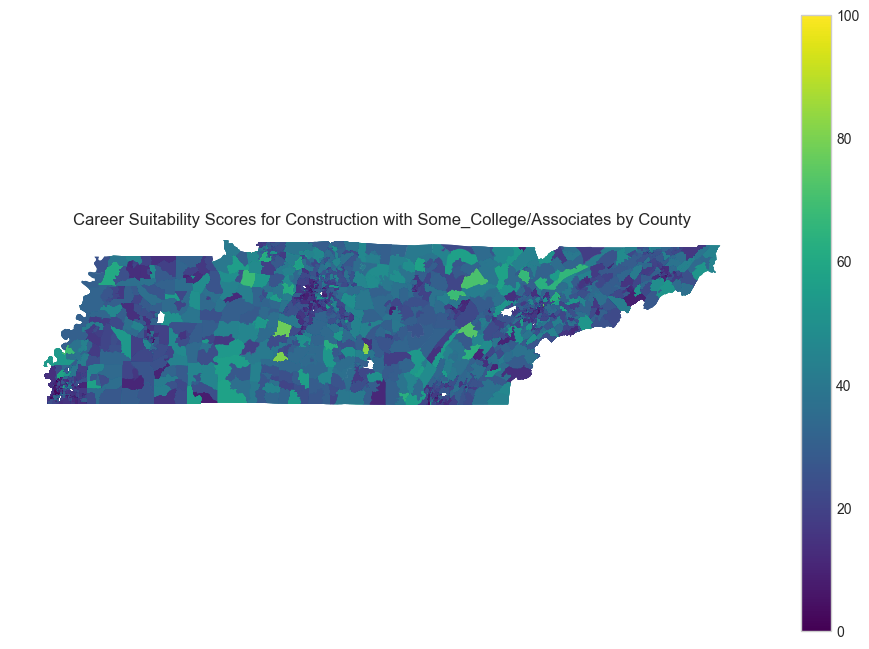

In [208]:
main()